<a href="https://colab.research.google.com/github/Santiagoguii/Big-data/blob/main/Dengue2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SINAN**

A escolha do dataset sobre dengue do Sistema de Informação de Agravos de Notificação (SINAN) para o ano de 2023 é relevante por várias razões:

**Importância da Saúde Pública:** A dengue é uma doença viral transmitida por mosquitos e representa um grande desafio de saúde pública, especialmente aqui no Brasil. Monitorar e analisar os casos de dengue são essencias para entender a epidemologia e elaborar estratégias de prevenção e controle.

**Disponibilidade de Dados Abertos:** O SINAN oferece dados abertos sobre casos de dengue notificados ao sistema de saúde, possibilitando análises epidemiológicas e estudos de saúde pública.

**Análise Epidemiológica:** O dataset oferece dados detalhados sobre casos de dengue, incluindo informações como data de notificação, localização geográfica, características demográficas dos pacientes, tipo de dengue e evolução do caso. Isso permite análises epidemiológicas para compreender padrões de incidência, identificar áreas de alto risco e avaliar as intervenções de saúde pública.

**Prevenção e Controle:** Através de dados, pode-se saber áreas e populações mais afetadas pela dengue, direcionando recursos para programas de prevenção e controle, como campanhas e medidas de controle.

**Pesquisa Científica:** O dataset serve de base para estudos acadêmicos e pesquisas sobre dengue, incluindo modelagem epidemiológica, análise de fatores de risco, avaliação de intervenções de saúde e elaboração de novas estratégias de controle de doença.

#**Dicionário de dados**

TP_NOT:

- Tipo de dado: Int
- Descrição: Código que representa o tipo de notificação.
- Observações: Pode incluir diferentes tipos de notificações relacionadas à dengue.

ID_AGRAVO:

- Tipo de dado: Varchar
- Descrição: Identificador do agravo.
- Observações: Representa o tipo específico de agravo relacionado à dengue.

DT_NOTIFIC:

- Tipo de dado: Date
- Descrição: Data da notificação.
- Observações: Indica quando a notificação foi registrada.

SEM_NOT:

- Tipo de dado: Int
- Descrição: Semana epidemiológica da notificação.
- Observações: Indica a semana epidemiológica em que a notificação foi feita.

NU_ANO:

- Tipo de dado: Year
- Descrição: Ano da notificação.
- Observações: Indica o ano em que a notificação foi feita.

SG_UF_NOT:

- Tipo de dado: int
- Descrição: unidade federativa da notificação.
- Observações: Representa o estado onde a notificação foi feita.

| Código | Estado                |
|--------|-----------------------|
| 11     | Rondônia              |
| 12     | Acre                  |
| 13     | Amazonas              |
| 14     | Roraima               |
| 15     | Pará                  |
| 16     | Amapá                 |
| 17     | Tocantins             |
| 21     | Maranhão              |
| 22     | Piauí                 |
| 23     | Ceará                 |
| 24     | Rio Grande do Norte   |
| 25     | Paraíba               |
| 26     | Pernambuco            |
| 27     | Alagoas               |
| 28     | Sergipe               |
| 29     | Bahia                 |
| 31     | Minas Gerais          |
| 32     | Espírito Santo        |
| 33     | Rio de Janeiro        |
| 35     | São Paulo             |
| 41     | Paraná                |
| 42     | Santa Catarina        |
| 43     | Rio Grande do Sul     |
| 50     | Mato Grosso do Sul    |
| 51     | Mato Grosso           |
| 52     | Goiás                 |
| 53     | Distrito Federal      |

ID_MUNICIP:

- Tipo de dado: Int
- Descrição: Identificador do município da notificação.
- Observações: Representa o município onde a notificação foi feita.

ID_REGIONA:

- Tipo de dado: Int
- Descrição: Identificador da região da notificação.
- Observações: Pode representar uma divisão administrativa regional.

ID_UNIDADE:

- Tipo de dado: Int
- Descrição: Identificador da unidade de saúde.
- Observações: Pode representar o local onde a notificação foi registrada.

DT_SIN_PRI:

- Tipo de dado: Date
- Descrição: Data do início dos sintomas.
- Observações: Indica quando os sintomas começaram a se manifestar.

EVIDENCIA:

- Tipo de dado: Varchar
- Descrição: Indicador de evidência da doença.
- Observações: Pode indicar se há evidências clínicas ou laboratoriais da doença.

PLAQ_MENOR:

- Tipo de dado: Int
- Descrição: Contagem de plaquetas menor.
- Observações: Representa a contagem de plaquetas mínima no paciente.

CON_FHD:

- Tipo de dado: Varchar
- Descrição: Condição de febre hemorrágica.
- Observações: Indica se o paciente apresenta condições relacionadas à febre hemorrágica.

COMPLICA:

- Tipo de dado: Varchar
- Descrição: Indicador de complicações.
- Observações: Pode indicar se houve complicações no quadro clínico do paciente.

TP_SISTEMA:

- Tipo de dado: Int
- Descrição: Tipo de sistema.
- Observações: Pode indicar o tipo de sistema de saúde ou de notificação - utilizado.

NDUPLIC_N:

- Tipo de dado: Int
- Descrição: Número de duplicatas na notificação.
- Observações: Indica o número de notificações duplicadas.

DT_DIGITA:

- Tipo de dado: Date
- Descrição: Data de digitação da notificação.
- Observações: Indica quando a notificação foi digitada no sistema.

CS_FLXRET:

- Tipo de dado: Int
- Descrição: Código de fluxo de retorno.
- Observações: Pode indicar o status do fluxo de retorno da notificação.

FLXRECEBI:

- Tipo de dado: int
- Descrição: Indicador de fluxo recebido.
- Observações: Pode indicar se o fluxo foi recebido ou não.

MIGRADO_W:

- Tipo de dado: Varchar
- Descrição: Indicador de migração.
- Observações: Pode indicar se os dados foram migrados de outro sistema ou fonte.

In [1]:
pip install pysus

In [2]:
from pysus.online_data import SINAN
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Listando as doenças disponíveis
SINAN.list_diseases()

{'ACBI': 'Acidente de trabalho com material biológico',
 'ACGR': 'Acidente de trabalho',
 'ANIM': 'Acidente por Animais Peçonhentos',
 'ANTR': 'Atendimento Antirrabico',
 'BOTU': 'Botulismo',
 'CANC': 'Cancêr relacionado ao trabalho',
 'CHAG': 'Doença de Chagas Aguda',
 'CHIK': 'Febre de Chikungunya',
 'COLE': 'Cólera',
 'COQU': 'Coqueluche',
 'DENG': 'Dengue',
 'DERM': 'Dermatoses ocupacionais',
 'DIFT': 'Difteria',
 'ESQU': 'Esquistossomose',
 'EXAN': 'Doença exantemáticas',
 'FMAC': 'Febre Maculosa',
 'FTIF': 'Febre Tifóide',
 'HANS': 'Hanseníase',
 'HANT': 'Hantavirose',
 'HEPA': 'Hepatites Virais',
 'IEXO': 'Intoxicação Exógena',
 'INFL': 'Influenza Pandêmica',
 'LEIV': 'Leishmaniose Visceral',
 'LEPT': 'Leptospirose',
 'LERD': 'LER/Dort',
 'LTAN': 'Leishmaniose Tegumentar Americana',
 'MALA': 'Malária',
 'MENI': 'Meningite',
 'MENT': 'Transtornos mentais relacionados ao trabalho',
 'NTRA': 'Notificação de Tracoma',
 'PAIR': 'Perda auditiva por ruído relacionado ao trabalho',
 'PE

In [4]:
#Baixando os dados sobre Dengue
SINAN.download('Deng', years=2023)

DENGBR23.parquet: 100%|██████████| 2.46M/2.46M [04:53<00:00, 8.36kB/s]


/root/pysus/DENGBR23.parquet

In [5]:
# Carregando o conjunto de dados
df_dengue = pd.read_parquet('/root/pysus/DENGBR23.parquet')

In [6]:
display(df_dengue.head())

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,...,EVIDENCIA,PLAQ_MENOR,CON_FHD,COMPLICA,TP_SISTEMA,NDUPLIC_N,DT_DIGITA,CS_FLXRET,FLXRECEBI,MIGRADO_W
0,2,A90,20230104,202301,2023,53,530010,,3019608,20230104,...,,,,,2,,20230105,0,,
1,2,A90,20230105,202301,2023,53,530010,,3005402,20230104,...,,,,,2,,20230119,0,,
2,2,A90,20230105,202301,2023,53,530010,,3019608,20230105,...,,,,,2,,20230106,0,,
3,2,A90,20230105,202301,2023,53,530010,,3019608,20230105,...,,,,,2,,20230106,0,,
4,2,A90,20230105,202301,2023,53,530010,,0010561,20230101,...,,,,,2,,20230106,0,,


In [7]:
# Verificando o número de registros e variáveis
print("Número de registros:", len(df_dengue))
print("Número de variáveis:", len(df_dengue.columns))

Número de registros: 1508653
Número de variáveis: 121


In [8]:
# Verificando informações (variáveis e possíveis lacunas nos dados)
print(df_dengue.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508653 entries, 0 to 1508652
Columns: 121 entries, TP_NOT to MIGRADO_W
dtypes: object(121)
memory usage: 1.4+ GB
None


In [9]:
# Verificando estatísticas descritivas das variáveis numéricas
display(df_dengue.describe())

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,...,EVIDENCIA,PLAQ_MENOR,CON_FHD,COMPLICA,TP_SISTEMA,NDUPLIC_N,DT_DIGITA,CS_FLXRET,FLXRECEBI,MIGRADO_W
count,1508653,1508653,1508653,1508653,1508653,1508653,1508653,1508653,1508653,1508653,...,1508653,1508653,1508653,1508653,1508653,1508653,1508653,1508653,1508653,1508653
unique,2,1,364,52,1,26,4537,311,26960,364,...,1,1,1,1,2,2,517,3,1,1
top,2,A90,20230410,202315,2023,31,411370,,7037112,20230410,...,,,,,2,,,0,,
freq,1508649,1508653,22553,105977,1508653,406035,47287,98057,11539,19030,...,1508653,1508653,1508653,1508653,1485456,1506412,23193,893913,1508653,1508653


In [10]:
# Verificando valores ausentes das variáveis
print("Valores ausentes por variável:")
print(df_dengue.isnull().sum())

Valores ausentes por variável:
TP_NOT        0
ID_AGRAVO     0
DT_NOTIFIC    0
SEM_NOT       0
NU_ANO        0
             ..
NDUPLIC_N     0
DT_DIGITA     0
CS_FLXRET     0
FLXRECEBI     0
MIGRADO_W     0
Length: 121, dtype: int64


In [11]:
df_dengue.columns

Index(['TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'ID_UNIDADE', 'DT_SIN_PRI',
       ...
       'EVIDENCIA', 'PLAQ_MENOR', 'CON_FHD', 'COMPLICA', 'TP_SISTEMA',
       'NDUPLIC_N', 'DT_DIGITA', 'CS_FLXRET', 'FLXRECEBI', 'MIGRADO_W'],
      dtype='object', length=121)

In [12]:
df_dengue = df_dengue.dropna()
display(df_dengue.head())

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,...,EVIDENCIA,PLAQ_MENOR,CON_FHD,COMPLICA,TP_SISTEMA,NDUPLIC_N,DT_DIGITA,CS_FLXRET,FLXRECEBI,MIGRADO_W
0,2,A90,20230104,202301,2023,53,530010,,3019608,20230104,...,,,,,2,,20230105,0,,
1,2,A90,20230105,202301,2023,53,530010,,3005402,20230104,...,,,,,2,,20230119,0,,
2,2,A90,20230105,202301,2023,53,530010,,3019608,20230105,...,,,,,2,,20230106,0,,
3,2,A90,20230105,202301,2023,53,530010,,3019608,20230105,...,,,,,2,,20230106,0,,
4,2,A90,20230105,202301,2023,53,530010,,0010561,20230101,...,,,,,2,,20230106,0,,


In [13]:
df_dengue['Mes_Notificacao'] = pd.to_datetime(df_dengue['DT_NOTIFIC']).dt.month

# **Tratamento de dados**

In [14]:
colunas_interessantes = ['DT_NOTIFIC', 'SG_UF_NOT', 'ID_MUNICIP', 'DT_SIN_PRI', 'EVOLUCAO', 'CLASSI_FIN', 'NU_IDADE_N', 'CS_SEXO', 'Mes_Notificacao']
df_dengue_reduzido = df_dengue[colunas_interessantes]

In [15]:
df_dengue_reduzido['EVOLUCAO'].fillna('IGNORADO', inplace=True)

<ipython-input-15-7ef543b348fe>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_dengue_reduzido['EVOLUCAO'].fillna('IGNORADO', inplace=True)
<ipython-input-15-7ef543b348fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dengue_reduzido['EVOLUCAO'].fillna('IGNORADO', inplace=True)


In [16]:
df_dengue_reduzido['DT_NOTIFIC'] = pd.to_datetime(df_dengue_reduzido['DT_NOTIFIC'], format='%Y%m%d', errors='coerce')

<ipython-input-16-1cf7fe1d1d8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dengue_reduzido['DT_NOTIFIC'] = pd.to_datetime(df_dengue_reduzido['DT_NOTIFIC'], format='%Y%m%d', errors='coerce')


In [17]:
display(df_dengue_reduzido.head())

,DT_NOTIFIC,SG_UF_NOT,ID_MUNICIP,DT_SIN_PRI,EVOLUCAO,CLASSI_FIN,NU_IDADE_N,CS_SEXO,Mes_Notificacao
0,2023-01-04,53,530010,20230104,9,10,4060,M,1
1,2023-01-05,53,530010,20230104,1,10,4027,M,1
2,2023-01-05,53,530010,20230105,9,10,4042,F,1
3,2023-01-05,53,530010,20230105,9,10,4023,F,1
4,2023-01-05,53,530010,20230101,,10,4047,F,1


#  **Análises**

##**Distribuição Temporal de Notificações ao Longo do Ano:**

In [18]:
df_dengue['Mes_Notificacao'] = df_dengue['DT_NOTIFIC'].apply(lambda x: str(x)[4:6])

In [19]:
notificacoes_mes = df_dengue['Mes_Notificacao'].value_counts().sort_index()

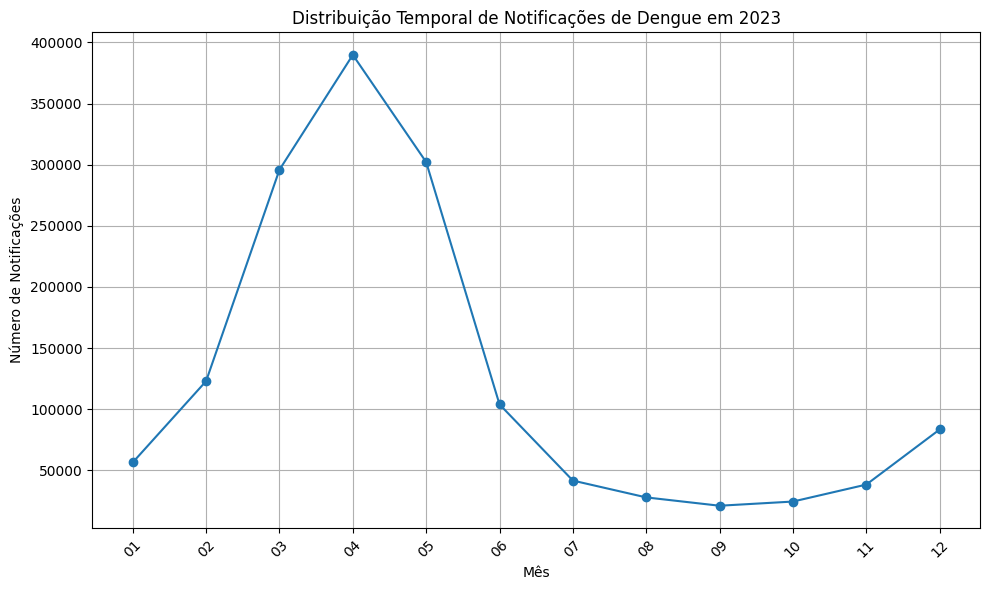

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(notificacoes_mes.index, notificacoes_mes.values, marker='o', linestyle='-')
plt.title('Distribuição Temporal de Notificações de Dengue em 2023')
plt.xlabel('Mês')
plt.ylabel('Número de Notificações')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##**Número de Notificações por UF:**



In [21]:
notificacoes_por_uf = df_dengue['SG_UF_NOT'].value_counts()

In [22]:
print("Número de Notificações por UF:")
print(notificacoes_por_uf)

Número de Notificações por UF:
SG_UF_NOT
31    406035
35    337173
41    209397
42    142000
52     70117
33     49917
29     47419
50     45173
53     42121
43     38675
51     28605
23     14480
11     10700
26      7977
24      7667
22      7614
25      7196
12      7173
13      6265
15      5688
21      4799
27      4772
17      3294
28      2952
16      1220
14       224
Name: count, dtype: int64


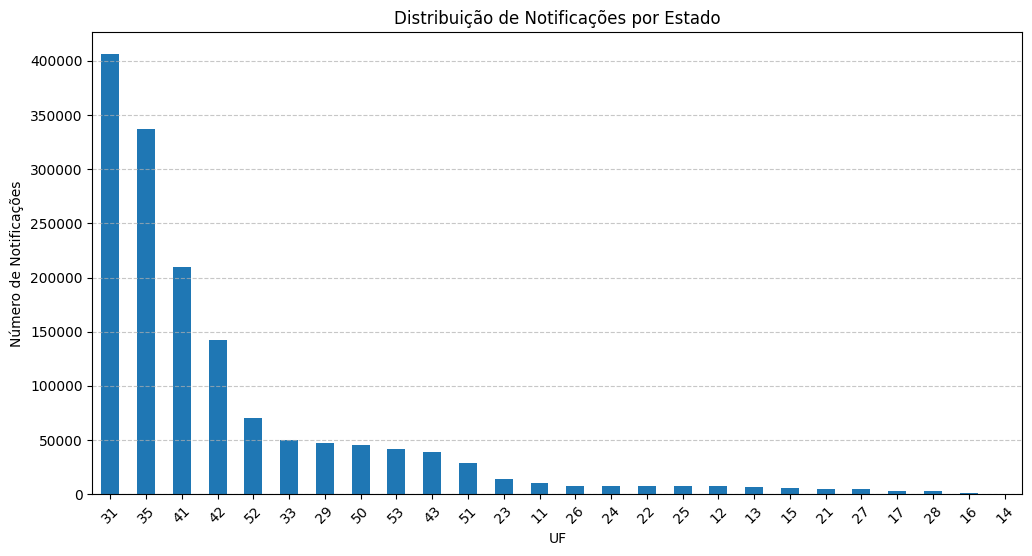

In [23]:
plt.figure(figsize=(12, 6))
notificacoes_por_uf.plot(kind='bar')
plt.title('Distribuição de Notificações por Estado')
plt.xlabel('UF')
plt.ylabel('Número de Notificações')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##**Distribuição de Notificações por Faixa Etária:**


In [24]:
notificacoes_por_faixa_etaria = df_dengue['NU_IDADE_N'].value_counts().sort_index()

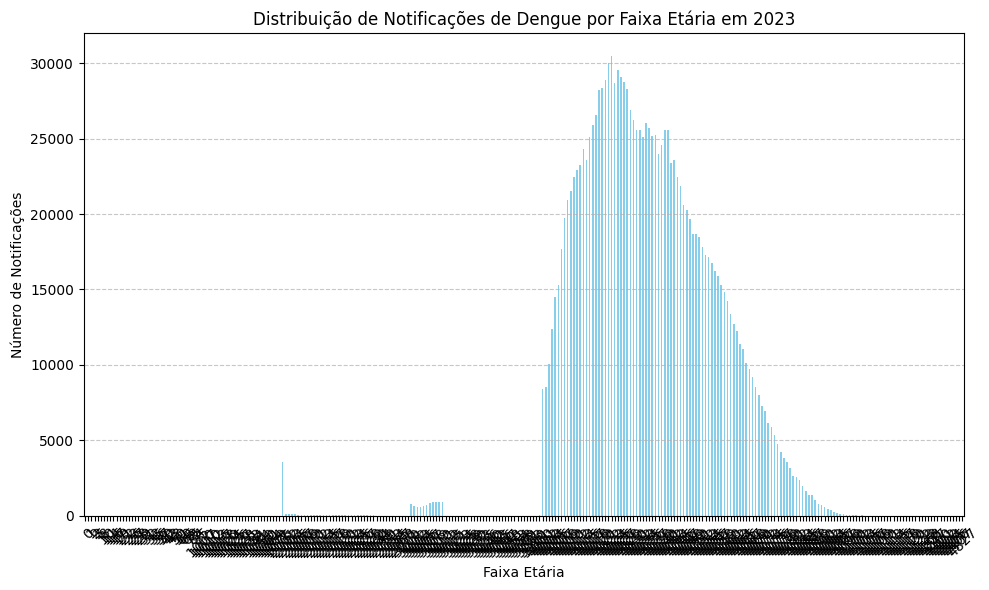

In [25]:
plt.figure(figsize=(10, 6))
notificacoes_por_faixa_etaria.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Notificações de Dengue por Faixa Etária em 2023')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Notificações')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##**Distribuição de Notificações por Gênero:**

In [26]:
notificacoes_por_genero = df_dengue['CS_SEXO'].value_counts()

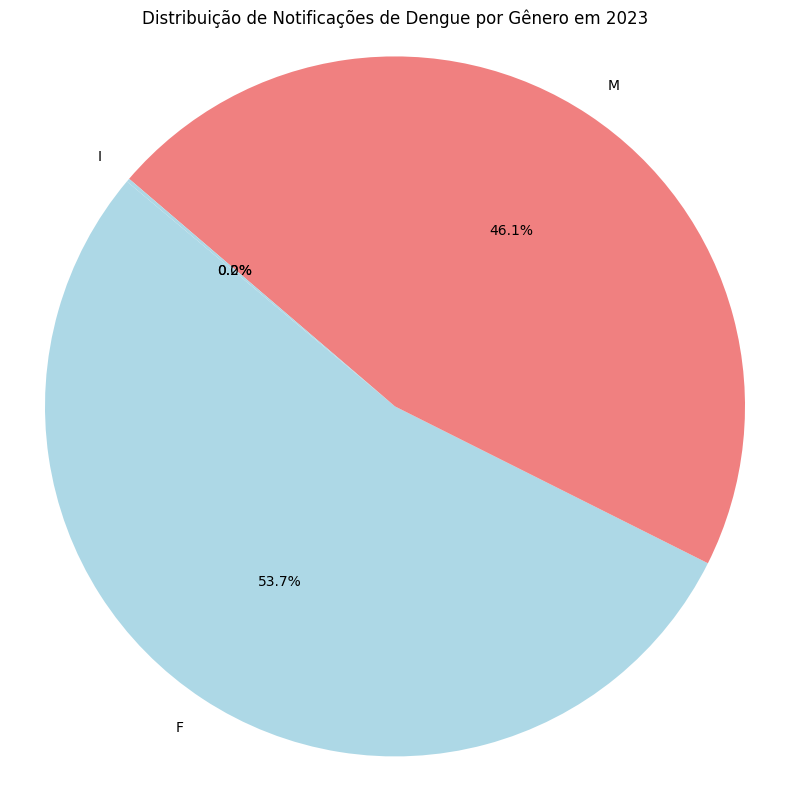

In [27]:
plt.figure(figsize=(8, 8))
plt.pie(notificacoes_por_genero, labels=notificacoes_por_genero.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Distribuição de Notificações de Dengue por Gênero em 2023')
plt.axis('equal')
plt.tight_layout()
plt.show()

##**Evolução Temporal das Notificações por Estado:**

In [28]:
notificacoes_estado_mes = df_dengue.groupby(['SG_UF_NOT', 'Mes_Notificacao']).size().unstack(fill_value=0)

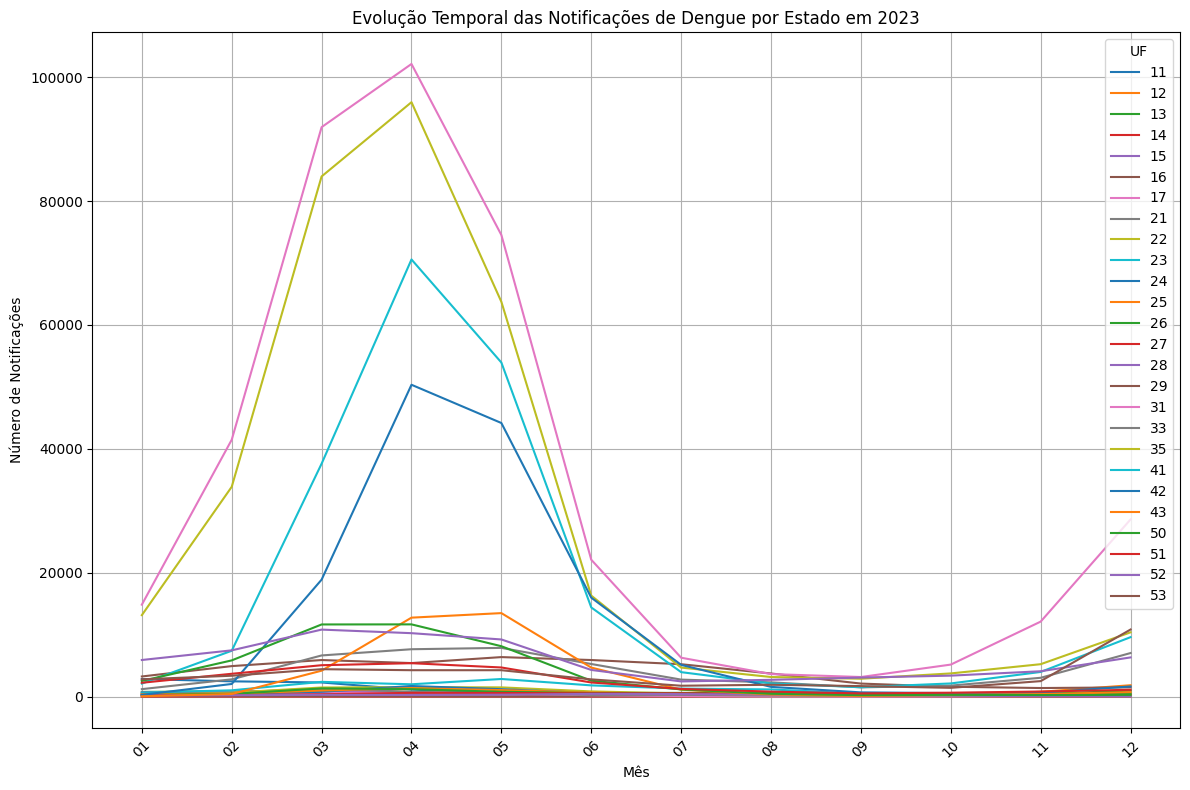

In [29]:
plt.figure(figsize=(12, 8))
for uf in notificacoes_estado_mes.index:
    plt.plot(notificacoes_estado_mes.columns, notificacoes_estado_mes.loc[uf], label=uf)

plt.title('Evolução Temporal das Notificações de Dengue por Estado em 2023')
plt.xlabel('Mês')
plt.ylabel('Número de Notificações')
plt.legend(title='UF')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Pysqrk**

In [30]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=4eb8a87bed4de209debff4a7da3988d04c93a2fbe42e5a382aae509dac21d150
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [71]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, count, when, isnan
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import month
from pyspark.sql import functions as F
from pyspark.ml.feature import Bucketizer

In [32]:
#Criação da Sessão Spark
spark = SparkSession.builder \
    .appName("Dengue Analysis") \
    .getOrCreate()

In [33]:
#Carregamento de Dados
df_dengue = spark.read.parquet('/root/pysus/DENGBR23.parquet')


In [34]:
#Exploração Inicial
df_dengue.printSchema()
df_dengue.show(5)

root
 |-- TP_NOT: string (nullable = true)
 |-- ID_AGRAVO: string (nullable = true)
 |-- DT_NOTIFIC: string (nullable = true)
 |-- SEM_NOT: string (nullable = true)
 |-- NU_ANO: string (nullable = true)
 |-- SG_UF_NOT: string (nullable = true)
 |-- ID_MUNICIP: string (nullable = true)
 |-- ID_REGIONA: string (nullable = true)
 |-- ID_UNIDADE: string (nullable = true)
 |-- DT_SIN_PRI: string (nullable = true)
 |-- SEM_PRI: string (nullable = true)
 |-- ANO_NASC: string (nullable = true)
 |-- NU_IDADE_N: string (nullable = true)
 |-- CS_SEXO: string (nullable = true)
 |-- CS_GESTANT: string (nullable = true)
 |-- CS_RACA: string (nullable = true)
 |-- CS_ESCOL_N: string (nullable = true)
 |-- SG_UF: string (nullable = true)
 |-- ID_MN_RESI: string (nullable = true)
 |-- ID_RG_RESI: string (nullable = true)
 |-- ID_PAIS: string (nullable = true)
 |-- DT_INVEST: string (nullable = true)
 |-- ID_OCUPA_N: string (nullable = true)
 |-- FEBRE: string (nullable = true)
 |-- MIALGIA: string (nul

## Tratamentos de dados

In [35]:
#Remoção de valores nulos
df_dengue_clean = df_dengue.na.drop()

In [36]:
df_dengue = df_dengue.withColumn("Mes_Notificacao", month(col("DT_NOTIFIC")))

In [37]:
df_dengue_clean = df_dengue_clean.withColumn("Mes_Notificacao", month(col("DT_NOTIFIC")))

In [38]:
#Seleção de colunas interessantes
colunas_interessantes = ['DT_NOTIFIC', 'SG_UF_NOT', 'ID_MUNICIP', 'DT_SIN_PRI', 'EVOLUCAO', 'CLASSI_FIN', 'NU_IDADE_N', 'CS_SEXO', 'Mes_Notificacao']
df_dengue_reduzido = df_dengue_clean.select(colunas_interessantes)


In [39]:
#Preenchimento de Valores Nulos
df_dengue_reduzido = df_dengue_reduzido.fillna({'EVOLUCAO': 'IGNORADO'})

## Processamento de Dados

In [40]:
# Conversão de Tipos de Dados
df_dengue_reduzido = df_dengue_reduzido \
    .withColumn('DT_NOTIFIC', to_date(col('DT_NOTIFIC'), 'yyyyMMdd')) \
    .withColumn('DT_SIN_PRI', to_date(col('DT_SIN_PRI'), 'yyyyMMdd')) \
    .withColumn('NU_IDADE_N', col('NU_IDADE_N').cast(IntegerType()))

In [41]:
# Cálculo de Estatísticas Descritivas
df_dengue_reduzido.describe().show()

+-------+------------------+-----------------+------------------+-----------------+------------------+-------+---------------+
|summary|         SG_UF_NOT|       ID_MUNICIP|          EVOLUCAO|       CLASSI_FIN|        NU_IDADE_N|CS_SEXO|Mes_Notificacao|
+-------+------------------+-----------------+------------------+-----------------+------------------+-------+---------------+
|  count|           1508653|          1508653|           1508653|          1508653|           1508653|1508653|              0|
|   mean|36.490954513728475|367128.7704289853|1.2476456178112163|9.739471151003574|4021.6215319228477|   NULL|           NULL|
| stddev| 8.032779707904902|79658.59588272992|1.3817350339381211|0.708159865193032| 147.7595206134379|   NULL|           NULL|
|    min|                11|           110001|                  |                 |                 0|       |           NULL|
|    max|                53|           530010|                 9|               8 |              4827|      M| 

In [42]:
# Contagem de Casos por Estado
df_dengue_reduzido.groupBy('SG_UF_NOT').count().show()

+---------+------+
|SG_UF_NOT| count|
+---------+------+
|       51| 28605|
|       15|  5688|
|       11| 10700|
|       29| 47419|
|       42|142000|
|       28|  2952|
|       22|  7614|
|       35|337173|
|       52| 70117|
|       16|  1220|
|       43| 38675|
|       31|406035|
|       27|  4772|
|       17|  3294|
|       26|  7977|
|       41|209397|
|       23| 14480|
|       25|  7196|
|       53| 42121|
|       33| 49917|
+---------+------+
only showing top 20 rows



## Análises

### Distribuição Temporal de Notificações ao Longo do Ano

In [43]:
spark = SparkSession.builder \
    .appName("Análise de Notificações de Dengue") \
    .getOrCreate()

In [44]:
#Carregamento de Dados
df_dengue = spark.read.parquet('/root/pysus/DENGBR23.parquet')


In [45]:
df_dengue = df_dengue.withColumn('Mes_Notificacao', F.substring(df_dengue['DT_NOTIFIC'], 5, 2))
notificacoes_mes = df_dengue.groupBy('Mes_Notificacao').count().orderBy('Mes_Notificacao')

In [46]:
notificacoes_mes_df = notificacoes_mes.toPandas()

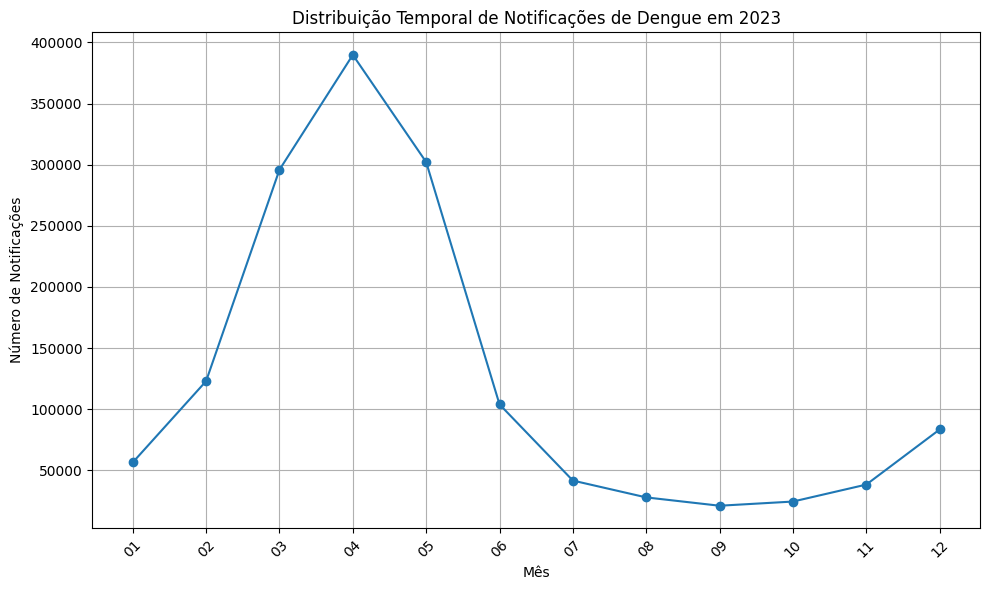

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(notificacoes_mes_df['Mes_Notificacao'], notificacoes_mes_df['count'], marker='o', linestyle='-')
plt.title('Distribuição Temporal de Notificações de Dengue em 2023')
plt.xlabel('Mês')
plt.ylabel('Número de Notificações')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Número de Notificações por UF

In [48]:
notificacoes_por_uf = df_dengue.groupBy('SG_UF_NOT').count().orderBy('count', ascending=False).toPandas()

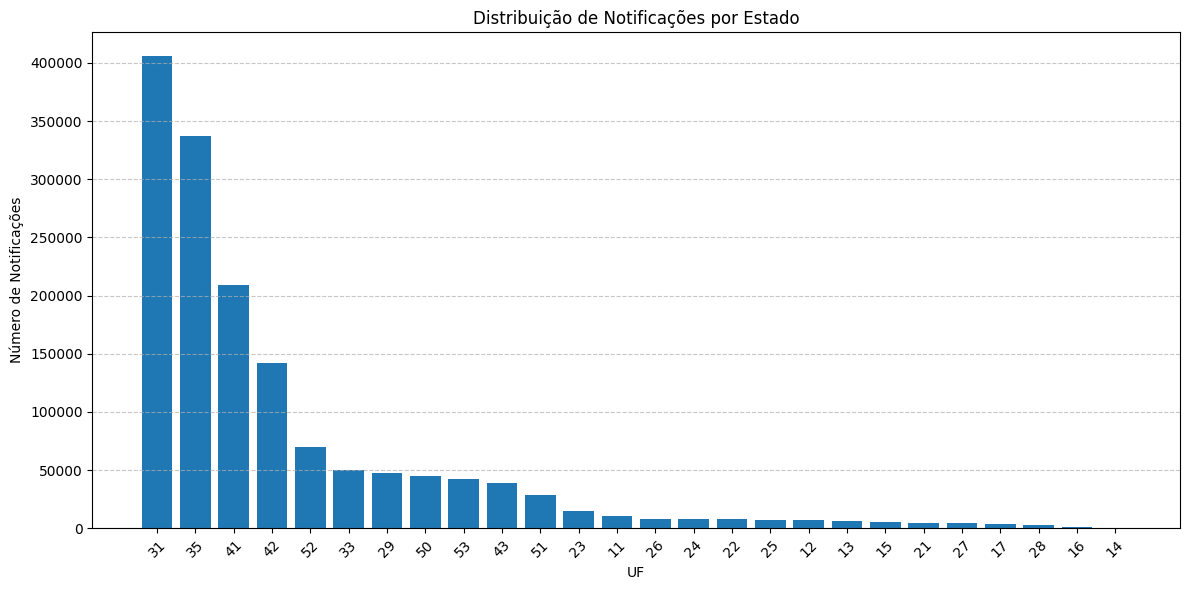

In [49]:
plt.figure(figsize=(12, 6))
plt.bar(notificacoes_por_uf['SG_UF_NOT'], notificacoes_por_uf['count'])
plt.title('Distribuição de Notificações por Estado')
plt.xlabel('UF')
plt.ylabel('Número de Notificações')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Distribuição de Notificações por Faixa Etária

In [50]:
notificacoes_por_faixa_etaria = df_dengue.groupBy('NU_IDADE_N').count().orderBy('NU_IDADE_N').toPandas()

Distribuição por idades em Geral

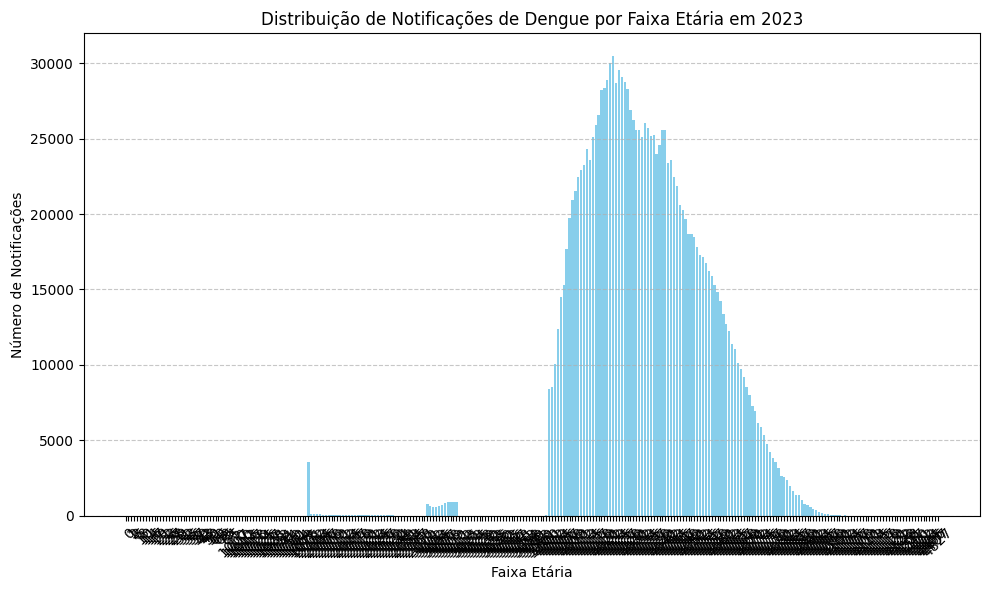

In [51]:
plt.figure(figsize=(10, 6))
plt.bar(notificacoes_por_faixa_etaria['NU_IDADE_N'], notificacoes_por_faixa_etaria['count'], color='skyblue')
plt.title('Distribuição de Notificações de Dengue por Faixa Etária em 2023')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Notificações')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Distribuição de idade menor que 50 anos

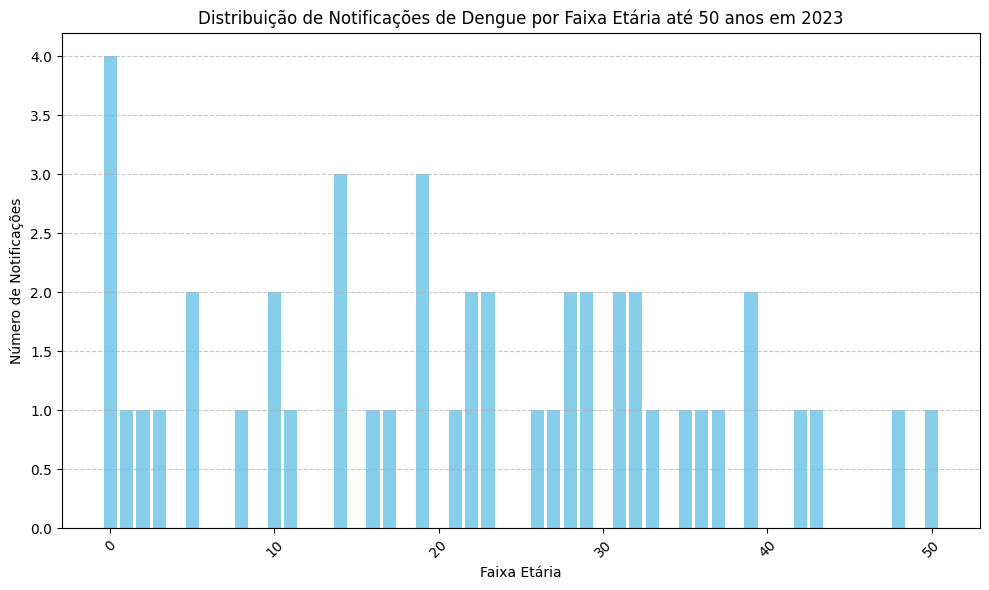

In [73]:
import pandas as pd

# Convert 'NU_IDADE_N' column to integers
notificacoes_por_faixa_etaria['NU_IDADE_N'] = notificacoes_por_faixa_etaria['NU_IDADE_N'].astype(int)

# Filter notifications for individuals aged 50 or younger
notificacoes_filtradas = notificacoes_por_faixa_etaria[notificacoes_por_faixa_etaria['NU_IDADE_N'] <= 50]

# Plot the filtered data
plt.figure(figsize=(10, 6))
plt.bar(notificacoes_filtradas['NU_IDADE_N'], notificacoes_filtradas['count'], color='skyblue')
plt.title('Distribuição de Notificações de Dengue por Faixa Etária até 50 anos em 2023')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Notificações')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Distribuição de idade maior que 50 anos

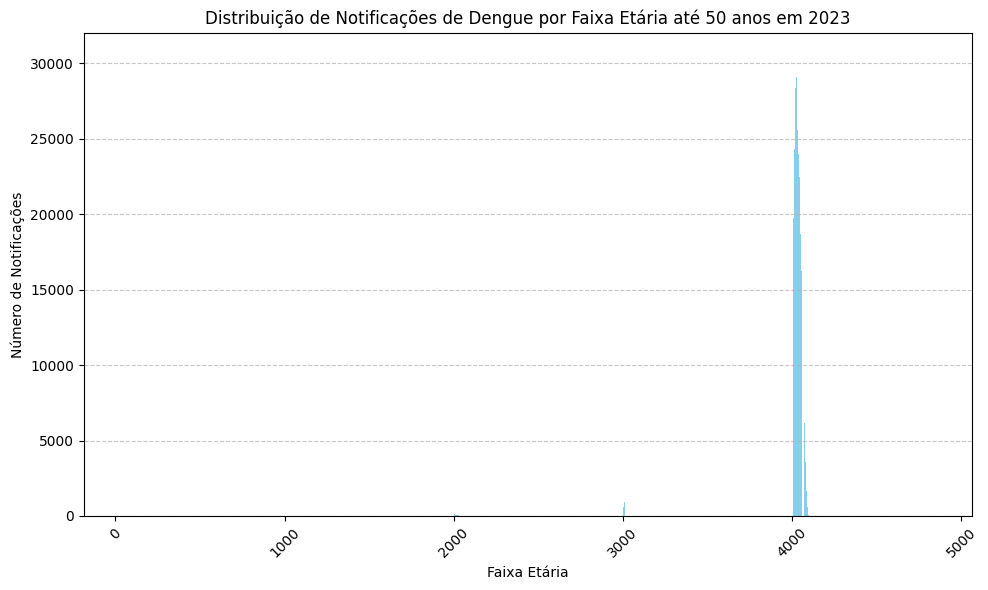

In [74]:
import pandas as pd

# Convert 'NU_IDADE_N' column to integers
notificacoes_por_faixa_etaria['NU_IDADE_N'] = notificacoes_por_faixa_etaria['NU_IDADE_N'].astype(int)

# Filter notifications for individuals aged 50 or younger
notificacoes_filtradas = notificacoes_por_faixa_etaria[notificacoes_por_faixa_etaria['NU_IDADE_N'] > 50]

# Plot the filtered data
plt.figure(figsize=(10, 6))
plt.bar(notificacoes_filtradas['NU_IDADE_N'], notificacoes_filtradas['count'], color='skyblue')
plt.title('Distribuição de Notificações de Dengue por Faixa Etária até 50 anos em 2023')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Notificações')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Distribuição de Notificações por Gênero

In [63]:
notificacoes_por_genero = df_dengue.groupBy('CS_SEXO').count()

In [64]:
notificacoes_por_genero = notificacoes_por_genero.collect()

In [65]:
labels = [row['CS_SEXO'] for row in notificacoes_por_genero]
sizes = [row['count'] for row in notificacoes_por_genero]
colors = ['lightblue', 'lightcoral']

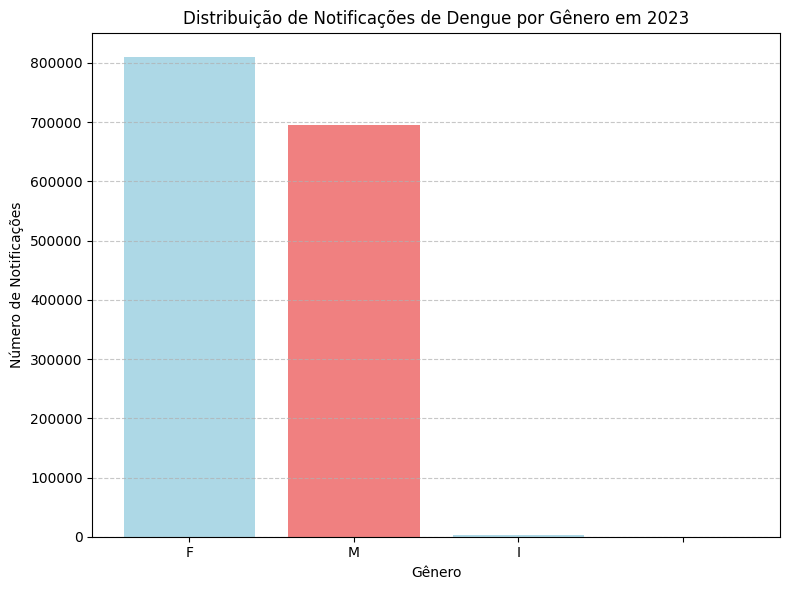

In [66]:
plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color=colors)
plt.title('Distribuição de Notificações de Dengue por Gênero em 2023')
plt.xlabel('Gênero')
plt.ylabel('Número de Notificações')
plt.xticks(rotation=0)  # Rotaciona os rótulos do eixo x, se necessário
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Evolução Temporal das Notificações por Estado

In [56]:
notificacoes_estado_mes = df_dengue.groupBy('SG_UF_NOT', 'Mes_Notificacao').count().orderBy('SG_UF_NOT', 'Mes_Notificacao').toPandas()

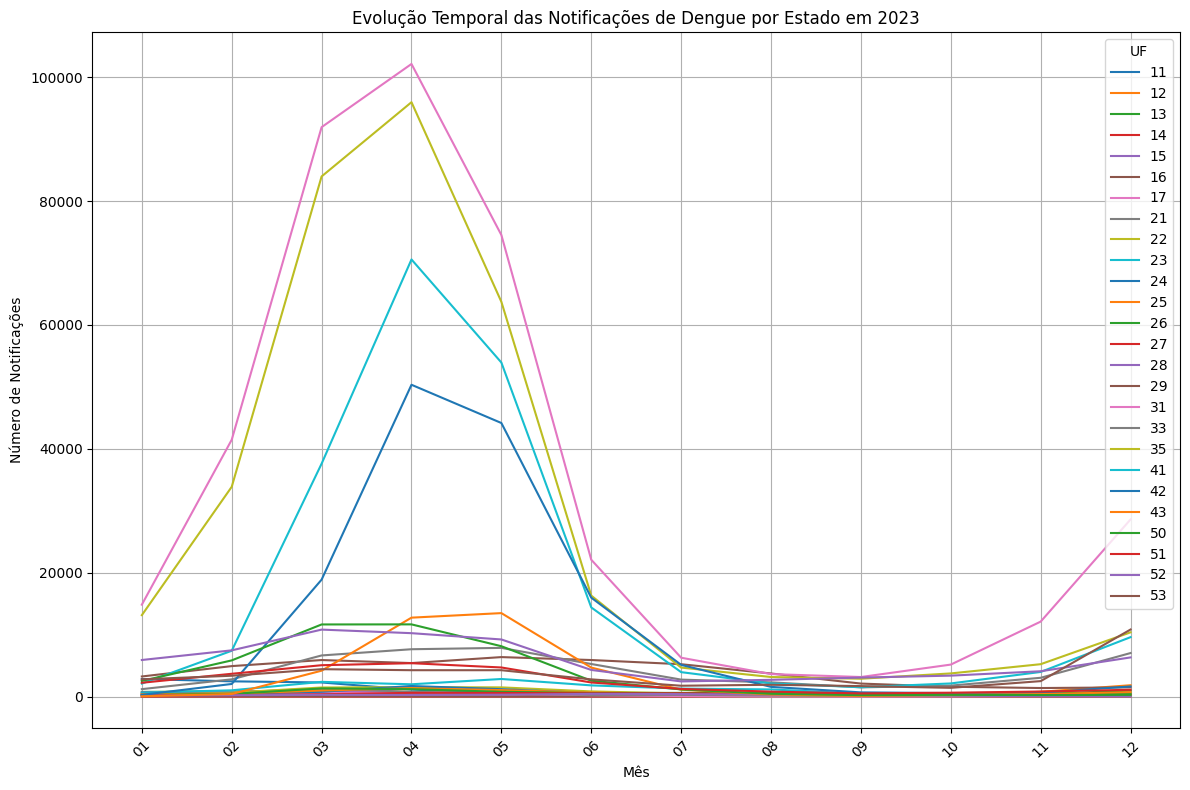

In [57]:
plt.figure(figsize=(12, 8))
for uf in notificacoes_estado_mes['SG_UF_NOT'].unique():
    data = notificacoes_estado_mes[notificacoes_estado_mes['SG_UF_NOT'] == uf]
    plt.plot(data['Mes_Notificacao'], data['count'], label=uf)

plt.title('Evolução Temporal das Notificações de Dengue por Estado em 2023')
plt.xlabel('Mês')
plt.ylabel('Número de Notificações')
plt.legend(title='UF')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
